In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:

# Define constants
IMAGE_SIZE = (299, 299) # might need to modify this to 224 x 224 pixels
BATCH_SIZE = 32
NUM_CLASSES = 4
EPOCHS = 10

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,  # 20% for validation
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine Learning Project/dataset_13',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 384 images belonging to 4 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine Learning Project/dataset_13',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 4 classes.


In [ ]:
# Load the pre-trained InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10
12/12 [==============================] - 269s 22s/step - loss: 1.7629 - accuracy: 0.4922 - val_loss: 1.1026 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 0.6423 - accuracy: 0.7344 - val_loss: 1.1232 - val_accuracy: 0.5208
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 0.5063 - accuracy: 0.7865 - val_loss: 0.7069 - val_accuracy: 0.6979
Epoch 4/10
12/12 [==============================] - 12s 1s/step - loss: 0.3669 - accuracy: 0.8542 - val_loss: 0.7446 - val_accuracy: 0.7604
Epoch 5/10
12/12 [==============================] - 12s 1s/step - loss: 0.3207 - accuracy: 0.8828 - val_loss: 0.8162 - val_accuracy: 0.6667
Epoch 6/10
12/12 [==============================] - 13s 1s/step - loss: 0.2873 - accuracy: 0.8984 - val_loss: 0.8852 - val_accuracy: 0.6771
Epoch 7/10
12/12 [==============================] - 12s 1s/step - loss: 0.2337 - accuracy: 0.9245 - val_loss: 0.7390 - val_accuracy: 0.7708
Epoch 8/10
12/12 [

In [ ]:
# Unfreeze some layers and fine-tune the model
for layer in base_model.layers[-50:]:
    layer.trainable = True

In [ ]:
# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Fine-tune the model
model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10
12/12 [==============================] - 27s 1s/step - loss: 1.0093 - accuracy: 0.7057 - val_loss: 16.4502 - val_accuracy: 0.3958
Epoch 2/10
12/12 [==============================] - 14s 1s/step - loss: 0.2851 - accuracy: 0.8984 - val_loss: 12.2948 - val_accuracy: 0.4271
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 0.1437 - accuracy: 0.9401 - val_loss: 7.6450 - val_accuracy: 0.5417
Epoch 4/10
12/12 [==============================] - 12s 1s/step - loss: 0.0917 - accuracy: 0.9609 - val_loss: 5.5689 - val_accuracy: 0.6458
Epoch 5/10
12/12 [==============================] - 16s 1s/step - loss: 0.0637 - accuracy: 0.9792 - val_loss: 3.9443 - val_accuracy: 0.6771
Epoch 6/10
12/12 [==============================] - 13s 1s/step - loss: 0.0953 - accuracy: 0.9792 - val_loss: 2.6077 - val_accuracy: 0.7292
Epoch 7/10
12/12 [==============================] - 13s 1s/step - loss: 0.0467 - accuracy: 0.9844 - val_loss: 3.2399 - val_accuracy: 0.6979
Epoch 8/10
12/12 [

In [ ]:
# Save the model
model.save('brain_tumor_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Make predictions on the validation data
val_predictions = model.predict(validation_generator, steps=validation_generator.samples // BATCH_SIZE + 1)
val_predicted_classes = np.argmax(val_predictions, axis=1)

3/4 [=====================>........] - ETA: 1s

4/4 [==============================] - 4s 792ms/step


In [ ]:
# Get true labels
val_true_classes = validation_generator.classes
val_class_labels = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
val_conf_matrix = confusion_matrix(val_true_classes, val_predicted_classes)

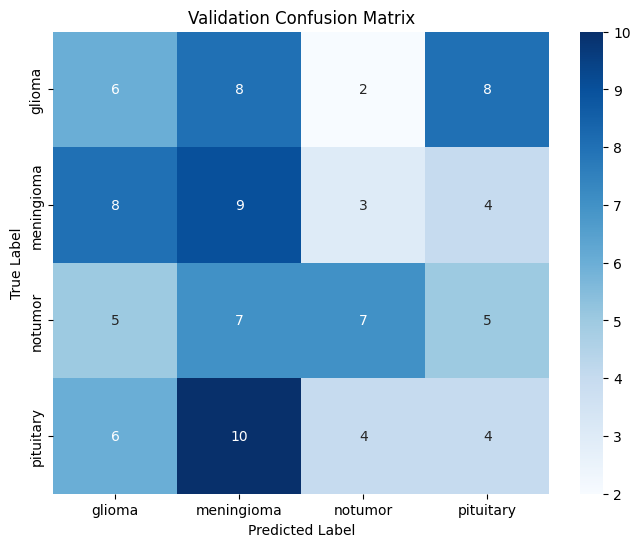

              precision    recall  f1-score   support

      glioma       0.24      0.25      0.24        24
  meningioma       0.26      0.38      0.31        24
     notumor       0.44      0.29      0.35        24
   pituitary       0.19      0.17      0.18        24

    accuracy                           0.27        96
   macro avg       0.28      0.27      0.27        96
weighted avg       0.28      0.27      0.27        96



In [ ]:

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_class_labels, yticklabels=val_class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(val_true_classes, val_predicted_classes, target_names=val_class_labels))

In [ ]:

# Load and preprocess the validation data
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine Learning Project/dataset_13',  # Replace with the path to your dataset
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True  # Shuffle to pick a random image
)

Found 96 images belonging to 4 classes.


In [ ]:
# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Select a single image and its label
x_batch, y_batch = next(validation_generator)  # Get a batch of images and labels
image = x_batch[0]  # Select the first image in the batch
true_label = np.argmax(y_batch[0])  # Get the true label index

# Predict the class of the selected image
image_expanded = np.expand_dims(image, axis=0)  # Expand dimensions to match input shape
predictions = model.predict(image_expanded)
predicted_label = np.argmax(predictions[0])

1/1 [==============================] - 0s 26ms/step


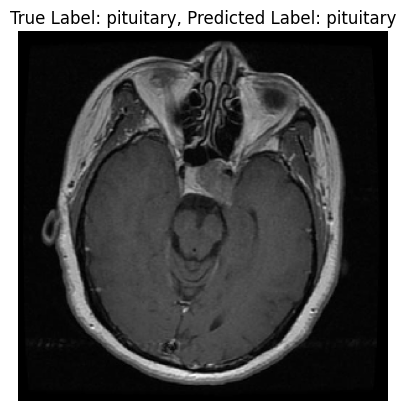

True Label: pituitary
Predicted Label: pituitary


In [ ]:
# Plot the image
plt.imshow(image / 2 + 0.5)  # Undo preprocessing for display (if necessary)
plt.title(f'True Label: {class_labels[true_label]}, Predicted Label: {class_labels[predicted_label]}')
plt.axis('off')
plt.show()

# Print true and predicted labels
print(f'True Label: {class_labels[true_label]}')
print(f'Predicted Label: {class_labels[predicted_label]}')